# PCA one level deeper

In [ ]:
import numpy

Given $X$ the data matrix. With shape features x samples.

Show with code that:

USV = svd(x)

XTX

Para esta explicación, asumamos $X$ es la design matrix (esto quiere decir que está ordernada con las samples como filas y las features como columnas, es decir, tiene forma [samples,features] ).

## Relación entre PCA y SVD
Vamos a mostrar que las componentes principales de $X$ se pueden obtener calculando la descomposición en valores singulares de B.

Empezamos definiendo, las siguientes matrices:

$n$ es el número de samples, 
$\bar{X}$ es la matriz de $n$ filas, dónde cada fila tenemos el vector promedio de las samples.

\begin{equation}
B := X - \bar{X} \\
C := B^TB \\
\end{equation}

Eigen decomposition de $C$
$$C V = \overbrace{V}^{\text{eigenvectors}} \underbrace{D}_{\text{eigenvalues}}$$

Las componentes principales de $X$, están dadas por $T$:
$$ T = BV $$

como la Singular Value Decomposition de $B$ nos da

\begin{equation}
B = U \Sigma V^T \\ 
\end{equation}

y como $V^TV=I$, podemos probar que $T$

\begin{align}
T = B V &= U \Sigma V^T V \\
&=  U \Sigma I \\
&= U \Sigma.
\end{align}

# ¿Qué es C?

Cómo $X$ está ordenada samples,features, $C$ me da la matriz de covarianzas entre mis features.

Pero si hubiera ordenado $X$ de manera de tener features,samples, $C$ sería la matriz de covarianzas entre mis samples.




## Scale or not to scale

https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

# Appendix

## Covarianza

$covar(X,Y) = \mathbb{E}[(X-\bar{x})(Y-\bar{y})]$

Si tengo $N$ samples puedo estimar la covarianza:

$\hat{covar}(X,Y) = \frac{1}{N} (\mathbb{x}-\mathbb{1} \bar{x})^T(\mathbb{y}- \mathbb{1}\bar{y})=\frac{1}{N-1} \sum_{i=1}^{N}(x_i-\bar{x})(y_i-\bar{y})$,

dónde $\bar{x} = \frac{1}{N-1} \sum_{x=1}^{N}x_i$

## Matrix as a Linear transformation
https://www.youtube.com/watch?v=g-Hb26agBFg

In [ ]:

# Test that
u, s, vh = np.linalg.svd(b, full_matrices=True)

# Uno tiene que darme u el otro tiene que darme v
# PCA es factorizar X@X_T en v W^2 v_T.  
# Esto es numericamente inestable y por eso no aplicamos PCA.
w, v = np.linalg.eig(X_T@X)

w, v = np.linalg.eig(X@X_T)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
X = df.iloc[:,:4].copy()

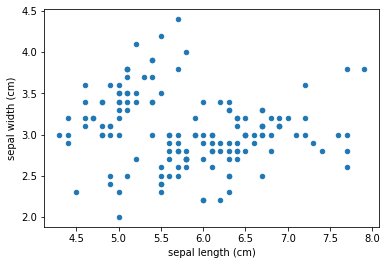

In [ ]:
X.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
# let us now standardize the dataset
X_scaled = StandardScaler().fit_transform(X)

df_scaled_cols = [col+" scaled" for col in iris['feature_names']]
df_scaled = pd.DataFrame(data= X_scaled ,
                 columns= df_scaled_cols)

In [ ]:
X_scaled.std()

1.0

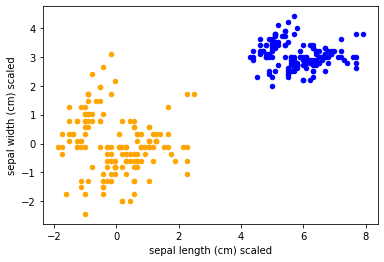

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
df.plot(x = df.columns[0], y = df.columns[1], kind='scatter',color='blue',ax=ax)
df_scaled.plot(x = df_scaled_cols[0], y = df_scaled_cols[1], kind='scatter',color='orange',ax=ax)

In [ ]:
data_np = np.array([(2,0),(2,6),(5,0),(5,4),(6,9),(7,0),(7,4),(10,0),(10,6),(15,9),(18,0),(18,6)])

data = pd.DataFrame(data=data_np,columns=["x","y"])

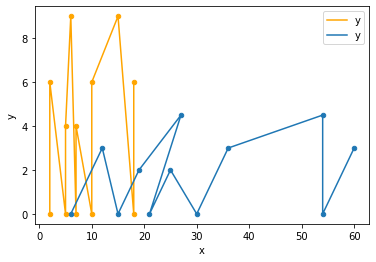

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
pd.DataFrame(data=data.values,columns=["x","y"]).plot(x='x',y='y',ax=ax,color='orange')
(pd.DataFrame(data=data.values@np.array([[3,0],[1,0.5]]),columns=["x","y"])).plot(x='x',y='y',ax=ax)
pd.DataFrame(data=data.values,columns=["x","y"]).plot(x='x',y='y',ax=ax,color='orange',kind='scatter')
(pd.DataFrame(data=data.values@np.array([[3,0],[1,0.5]]),columns=["x","y"])).plot(x='x',y='y',ax=ax,kind='scatter')

## References

https://www.youtube.com/watch?v=nbBvuuNVfco  

https://www.youtube.com/watch?v=xy3QyyhiuY4  

[Singular Value Decomposition (SVD): Dominant Correlations](
https://www.youtube.com/watch?v=WmDnaoY2Ivs)  

[Principal Component Analysis (PCA)](https://www.youtube.com/watch?v=fkf4IBRSeEc)  


[Eigenvalues and Eigenvectors](https://www.youtube.com/watch?v=PFDu9oVAE-g)